<div style="text-align: center; background-color: #FFA726; padding: 20px; color: #FFFFFF; font-family: 'Roboto', Helvetica, Arial, sans-serif;">
    <h2 style="font-weight: bold; font-size: 36px; margin: 0;">0. Importing Packages</h2>
</div>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud


| Package              | Description                                                                                         | Benefit                                                                                                      |
|----------------------|-----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| **pandas**           | A library providing high-performance, easy-to-use data structures and data analysis tools.          | Enables efficient data manipulation and analysis, facilitating data exploration, cleaning, and processing.   |
| **numpy**            | A fundamental package for scientific computing with Python, supporting large, multi-dimensional arrays and matrices. | Offers comprehensive mathematical functions, allowing for complex numerical operations and analysis.         |
| **matplotlib**       | A plotting library for creating static, interactive, and animated visualizations in Python.         | Provides a versatile suite for data visualization, supporting a wide range of plots and customizations.      |
| **seaborn**          | A statistical data visualization library based on matplotlib, offering a higher-level interface for drawing attractive and informative statistical graphics. | Simplifies creating complex visualizations from data, offering beautiful default styles and color palettes.  |
| **IPython.display**  | A toolkit providing rich media display capabilities to Jupyter notebooks, allowing the embedding of images and videos, and rendering of formatted data. | Enhances the interactive computing experience, enabling dynamic display of outputs within Jupyter notebooks. |
| **WordCloud**        | A tool for generating “word cloud” images from text, emphasizing words that appear more frequently by making them bigger and bolder. | Visually represents text data, highlighting prevalent themes or terms in a fun and engaging way.             |


<div style="text-align: center; background-color: #FFA726; padding: 20px; color: #FFFFFF; font-family: 'Roboto', Helvetica, Arial, sans-serif;">
    <h2 style="font-weight: bold; font-size: 36px; margin: 0;">1. Loading & Inspecting the Dataset</h2>
</div>

The function `loading_datasets` takes a single argument, base_path, which is expected to be the directory path where the Parquet files are stored. Within the function:

1. The first part of the code are comments on how to read csv files and then transforming them to parquet files for better performance in the next part of the code. 
2. **`File Paths`**: It constructs file paths for four Parquet files (movies.parquet, ratings.parquet, tags.parquet, links.parquet) by appending the filenames to base_path.
3. **`Data Loading`**: It uses pandas' read_parquet function with the pyarrow engine to read these files into DataFrames. This is done for its performance advantages compared to other engines.
3. **`Dimension Reporting`**: After loading each file into a DataFrame, the function prints the dimensions (number of rows and columns) of each DataFrame to provide an overview of the dataset sizes.
4. **`Uniqueness Calculations`**: The function then calculates and prints the number of unique movies and users in the datasets, as well as the number of unique ratings and timestamps in the ratings dataset, and the number of unique tags in the tags dataset.
5. **`Genre Analysis`**: It also calculates the number of unique genres and unique genre words in the movies dataset. This is achieved by splitting the genres string on the pipe character (|) and counting the distinct elements.
6. **`Preview of DataFrames`**: The function provides a preview of each DataFrame by printing the first few rows, which helps to understand the structure and content of the loaded data.
7. **`Return Statement`**: Finally, the function returns the four DataFrames, allowing them to be used for further analysis outside of the function.

In [3]:
def loading_datasets(base_path):

    # # Specify the input paths for the CSV files
    # csv_movies = f'{base_path}movies.csv'
    # csv_ratings = f'{base_path}ratings.csv'
    # csv_tags = f'{base_path}tags.csv'
    # csv_links = f'{base_path}links.csv'

    # # Read the CSV files into pandas DataFrames
    # df_movies = pd.read_csv(csv_movies)
    # df_ratings = pd.read_csv(csv_ratings)
    # df_tags = pd.read_csv(csv_tags)
    # df_links = pd.read_csv(csv_links)

    # # Save the DataFrames to Parquet files
    # df_movies.to_parquet('movies.parquet', index=False)
    # df_ratings.to_parquet('ratings.parquet', index=False)
    # df_tags.to_parquet('tags.parquet', index=False)
    # df_links.to_parquet('links.parquet', index=False)

    # Specify the output paths for the Parquet files
    parquet_movies = f'{base_path}movies.parquet'
    parquet_ratings = f'{base_path}ratings.parquet'
    parquet_tags = f'{base_path}tags.parquet'
    parquet_links = f'{base_path}links.parquet'

    # Reading the Parquet files into pandas DataFrames using "pyarrow" for better performance
    df_movies = pd.read_parquet(parquet_movies, engine='pyarrow')
    df_ratings = pd.read_parquet(parquet_ratings, engine='pyarrow')
    df_tags = pd.read_parquet(parquet_tags, engine='pyarrow')
    df_links = pd.read_parquet(parquet_links, engine='pyarrow')

    # Printing the dimensions of the dataframes
    print('The dimensions of the movies dataset are:', df_movies.shape)
    print('The dimensions of the ratings dataset are:', df_ratings.shape)
    print('The dimensions of the tags dataset are:', df_tags.shape)
    print('The dimensions of the links dataset are:', df_links.shape)

    # Calculating and printing the number of unique movies across different datasets
    print(f"\nThe number of unique movies in the movies dataset is {df_movies['movieId'].nunique()}")
    print(f"The number of unique movies in the ratings dataset is {df_ratings['movieId'].nunique()}")
    print(f"The number of unique movies in the links dataset is {df_links['movieId'].nunique()}")
    print(f"The number of unique movies in the tags dataset is {df_tags['movieId'].nunique()}")

    # Calculating and printing the number of unique users in ratings and tags datasets
    print(f"\nThe number of unique users in the ratings dataset is {df_ratings['userId'].nunique()}")
    print(f"The number of unique users in the tags dataset is {df_tags['userId'].nunique()}")

    # Calculating and printing the number of unique ratings in ratings and tags datasets
    print(f"\nThe number of unique ratings in the ratings dataset is {df_ratings['rating'].nunique()}")
    print(f"The number of unique timestamps in the ratings dataset is {df_ratings['timestamp'].nunique()}")
    print(f"The number of unique tags in the tags dataset is {df_tags['tag'].nunique()}")

    # Additional genre-related unique calculations
    print(f"\nThe number of unique genres (genre combinations) in the movies dataset is {df_movies['genres'].nunique()}")
    print(f"The number of unique genre words in the movies dataset is {df_movies['genres'].str.split('|').explode().nunique()}")

    # Printing the first few rows of each DataFrame
    print("\nFirst few rows of the movies dataset:")
    print(df_movies.head())
    print("\nFirst few rows of the ratings dataset:")
    print(df_ratings.head())
    print("\nFirst few rows of the tags dataset:")
    print(df_tags.head())
    print("\nFirst few rows of the links dataset:")
    print(df_links.head())

    # Optionally return the DataFrames if you need them for further analysis
    return df_movies, df_ratings, df_tags, df_links

#  Usage
path = '/Users/sandervanduin/Desktop/HVA weekly /System Development Marketing/25dataset/'
df_movies, df_ratings, df_tags, df_links = loading_datasets(path)

#############          OPTIONAL          ################

### Make sure to click on "scrollable" to see all the dataframes ###


The dimensions of the movies dataset are: (62423, 3)
The dimensions of the ratings dataset are: (25000095, 4)
The dimensions of the tags dataset are: (1093360, 4)
The dimensions of the links dataset are: (62423, 3)

The number of unique movies in the movies dataset is 62423
The number of unique movies in the ratings dataset is 59047
The number of unique movies in the links dataset is 62423
The number of unique movies in the tags dataset is 45251

The number of unique users in the ratings dataset is 162541
The number of unique users in the tags dataset is 14592

The number of unique ratings in the ratings dataset is 10
The number of unique timestamps in the ratings dataset is 20115267
The number of unique tags in the tags dataset is 73050

The number of unique genres (genre combinations) in the movies dataset is 1639
The number of unique genre words in the movies dataset is 20

First few rows of the movies dataset:
   movieId                               title  \
0        1            

#### `Main takeaways`
**Dataset Sizes**:
- The movies dataset contains information about 62,423 movies with three attributes each.
- The ratings dataset is significantly larger, comprising over 25 million ratings across four attributes.
- The tags dataset includes 1,093,360 instances, each with four attributes.
- The links dataset, matching the size of the movies dataset, contains 62,423 entries with three attributes each.

**Unique Counts**:
- All movies listed in the movies and links datasets are unique. --> no duplicate movies
- The ratings dataset includes ratings for 59,047 distinct movies, which is fewer than the total number of movies in the movies dataset.
- The tags dataset references 45,251 unique movies, which is the least among the datasets, indicating not all movies have been tagged.

**User Participation:**
- There are 162,541 unique users who have provided ratings, showing a broad user base.
- A smaller subset of 14,592 users have contributed tags, indicating a more selective level of user engagement with tagging functionality.

**Ratings Specifics**:
- Users have given ratings that can be categorized into 10 distinct values, on a scale (e.g., 1 to 5, including half-step ratings like 3.5).
- There is a large variety of timestamps (over 20 million unique), suggesting diverse times of user activity.

**Tagging Activity**:
- The dataset contains 73,050 unique tags, reflecting a wide variety of descriptors that users have applied to movies.

**Genre Diversity**:
- There are 1,639 unique genre combinations, showing a rich diversity in how movies are categorized.
- Only 20 unique genre words are used across these combinations, which means movies are labeled with a limited set of genre terms, but in varied combinations.

# Merging the two most needed files

The reason for merging only these two files, is because these files are needed for the modelling and makeing recommendations in future chapters

In [4]:
# Merging the DataFrames on 'movieId' to create a new DataFrame
sample_df_time = pd.merge(df_ratings, df_movies, on='movieId')
# Dropping the 'timestamp' column because it is not needed for this analysis
sample_df = sample_df_time.drop(['timestamp'], axis=1)

print("\n Shape of merged DataFrame: ",sample_df.shape)
print("Unique movieId: ",sample_df['movieId'].nunique())
print("Unique userId: ",sample_df['userId'].nunique())


sample_df.sample(10)


 Shape of merged DataFrame:  (25000095, 5)
Unique movieId:  59047
Unique userId:  162541


,userId,movieId,rating,title,genres
12739748,98301,1262,3.5,"Great Escape, The (1963)",Action|Adventure|Drama|War
12725288,95891,1247,4.5,"Graduate, The (1967)",Comedy|Drama|Romance
5170042,136273,2959,4.0,Fight Club (1999),Action|Crime|Drama|Thriller
15601233,78713,2288,4.5,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller
10077007,96918,350,3.0,"Client, The (1994)",Drama|Mystery|Thriller
15359251,79382,40629,4.5,Pride & Prejudice (2005),Drama|Romance
908507,14316,318,5.0,"Shawshank Redemption, The (1994)",Crime|Drama
24706947,14955,46848,0.5,"Gumball Rally, The (1976)",Adventure|Comedy
11588175,56339,923,4.5,Citizen Kane (1941),Drama|Mystery
20795464,79240,5066,3.0,"Walk to Remember, A (2002)",Drama|Romance


- As can be concluded, thera are far more users than movies in this dataset.
- ----> if you calculate the average amount of movies an user rated in this dataset, it would be 162541 / 59047 = 2.75 ~ 3 movies per user

<div style="text-align: center; background-color: #FFA726; padding: 20px; color: #FFFFFF; font-family: 'Roboto', Helvetica, Arial, sans-serif;">
    <h2 style="font-weight: bold; font-size: 36px; margin: 0;">2. Descriptive Analysis</h2>
</div>

#### Six descriptive insights into the dataset

*`Movie Rating Frequency`*: The code calculates the number of times each rating value occurs in the sample_df DataFrame and displays the result. This shows how frequently each rating value (like 1, 2, 3, etc.) was given across all movies in the sample.

*`User with the Most Ratings`*: The code identifies which users have rated the most movies in sample_df by counting the number of ratings each user has given and then sorting this count in descending order. The result is displayed, highlighting the most active users in terms of ratings.

*`Year Frequency of Rated Movies`*: The code extracts the year from movie titles in sample_df using a regular expression and then counts how many movies were rated in each year, displaying this frequency in a sorted list.

*`Year Frequency of Unique Movies`*: Similar to the previous step, the code extracts the release year from movie titles in df_movies and calculates the frequency of unique movies released each year, then displays this information.

*`First Genre of Each Movie`*: The code splits the genres column of df_movies into individual genres and then counts how many movies are listed for each genre. It displays the frequency of the first-listed genre for each movie in the dataset.
Each segment effectively summarizes different aspects of the movie dataset, such as the distribution of ratings, the most active raters, the distribution of movies across years, and the popularity of genres.

*`Genre frequency of unique movies`*: This code is similar to the previous step, only now its for unique movies

In [8]:
# Movie rating frequency
rating_freq_movies = pd.DataFrame(sample_df.groupby('rating').size(), columns=['count'])
print("Movie rating frequency:")
display(rating_freq_movies)

# userId with the highest count of ratings
df_ratings_new = sample_df[['userId', 'movieId', 'rating']]
# Count the number of ratings for each user
user_rating_count = df_ratings_new.groupby('userId').size().sort_values(ascending=False).reset_index(name='count')
user_rating_count = pd.DataFrame(user_rating_count)
print("\nuserId with the highest count of ratings:")
display(user_rating_count)

# Year frequency of rated movies
df_year = sample_df['title']
# Extract the year from the movie title using regex (\(\d\d\d\d\))
df_year = df_year.str.extract(r'\((\d\d\d\d)\)', expand=False).dropna().astype(int)
# Count the number of movies released in each year
year_freq_movies = df_year.value_counts(ascending=False).reset_index()
year_freq_movies.columns=['year', 'count']
print("\nYear frequency of all (non-unique) rated movies:")
display(year_freq_movies)

# Year fequency of unique movies
# Extract the year from the unique movie dataset
df_year = df_movies['title']
df_year = df_year.str.extract(r'\((\d\d\d\d)\)', expand=False).dropna().astype(int)
# Count the number of unique movies released in each year
year_freq_unique_movies = df_year.value_counts(ascending=False).reset_index()
year_freq_unique_movies.columns=['year', 'count']
print("\nYear frequency of unique movies:")
display(year_freq_unique_movies)

# Genre frequency of rated movies
df_first_genre = df_movies.copy()
# Split the 'genres' column using the '|' separator to extract the first genre listed for each movie
df_first_genre['genres'] = df_movies['genres'].str.split('|')
# Explode the 'genres' column to create a new row for each genre for each movie
df_first_genre = df_first_genre.explode('genres')
df_first_genre = pd.DataFrame(df_first_genre)
# Count the number of movies in each genre
df_genre_counts = df_first_genre['genres'].value_counts().to_frame()
df_genre_counts.columns = ['count']
print("\nFirst genre of each movie:")
display(df_genre_counts)

# Genre frequency of unique movies
# Genre frequency of unique movies
# Extract the first genre from the unique movie dataset
df_first_genre_unique = df_movies['genres'].str.split('|', expand=True)[0]
# Count the number of unique movies in each genre
df_genre_counts_unique = df_first_genre_unique.value_counts().to_frame()
df_genre_counts_unique.columns = ['count']
print("\nFirst genre of unique movies:")
display(df_genre_counts_unique)


Movie rating frequency:


,count
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539



userId with the highest count of ratings:


,userId,count
0,72315,32202
1,80974,9178
2,137293,8913
3,33844,7919
4,20055,7488
...,...,...
162536,12094,20
162537,119539,20
162538,156759,20
162539,12084,20



Year frequency of all (non-unique) rated movies:


,year,count
0,1995,1497480
1,1994,1302930
2,1999,1123964
3,1996,1109841
4,2000,966773
...,...,...
130,1878,22
131,1874,18
132,1887,16
133,1883,11



Year frequency of unique movies:


,year,count
0,2015,2513
1,2016,2488
2,2014,2406
3,2017,2374
4,2013,2173
...,...,...
130,1883,1
131,1887,1
132,1874,1
133,1878,1



First genre of each movie:


,count
genres,
Drama,25606
Comedy,16870
Thriller,8654
Romance,7719
Action,7348
Horror,5989
Documentary,5605
Crime,5319
(no genres listed),5062



First genre of unique movies:


,count
0,
Drama,15319
Comedy,13670
Action,7348
Documentary,5206
(no genres listed),5062
Horror,3455
Crime,3034
Adventure,2493
Animation,2089


#### Explaining the results

- **Movie Rating Frequency**: Ratings of 0.5 to 5.0 are used, with half-step increments. The most common rating given is 4.0, followed by 3.0 and 5.0, suggesting that users tend to rate movies favorably. The least common ratings are at the extremes, with 0.5 being the least frequent.

- **User Rating Activity**: The user with userId 72315 has given the most ratings, numbering 32,202. This indicates a highly active user. The rest of the top users also show significant activity, with thousands of ratings each, though there's a steep drop-off from the top user to the others.

- **Year Frequency of Movies (Rated)**: The year 1995 saw the highest number of rated movies, followed closely by 1994 and 1999. This could indicate either a high volume of releases in those years or increased user activity related to movies from that period.

- **Year Frequency of Unique Movies**: The years with the most unique movie releases in the dataset are 2015, followed by 2016 and 2014. This recent bias may reflect the growth of the dataset over time or increased production of movies in recent years.

- **First Genre of Each Movie:** Drama is the most common first-listed genre, followed by Comedy and Thriller. This indicates a preference or higher production of these genres within the dataset. Genres such as Western, Musical, and Film-Noir are much less common, which might reflect their popularity or the number of films produced in those genres.

- **First genre of unique movies**: The dataset is dominated by Drama as the leading genre, with Comedy closely following. Action holds a substantial count as well, suggesting these genres are prominent in movie production or preference among the dataset


In [8]:
# Highest number of ratings per movie with the average rating
popular_movies_mean = sample_df.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False).to_frame()
popular_movies_count = sample_df.groupby(['title']).size().to_frame()

# Merge the two dataframes to get the number of ratings and the average rating for each movie
high_rated_movies = pd.merge(popular_movies_mean, popular_movies_count, on='title', how='inner')
high_rated_movies.columns = ['rating', '# of ratings']
high_rated_movies.sort_values(by='# of ratings', ascending=False).head(10)

,rating,# of ratings
title,,
Forrest Gump (1994),4.048011,81491
"Shawshank Redemption, The (1994)",4.413576,81482
Pulp Fiction (1994),4.188912,79672
"Silence of the Lambs, The (1991)",4.151342,74127
"Matrix, The (1999)",4.154099,72674
Star Wars: Episode IV - A New Hope (1977),4.120189,68717
Jurassic Park (1993),3.679175,64144
Schindler's List (1993),4.247579,60411
Braveheart (1995),4.002273,59184


The code above identifies movies with the highest number of ratings and their average ratings

*`Results`*: The resulting sorted list displays the top movies, led by "Forrest Gump (1994)" with the highest number of ratings received (81,491) and an average rating of approximately 4.04. Following closely are "Shawshank Redemption, The (1994)" and "Pulp Fiction (1994)", both with high numbers of ratings and average ratings above 4. Other movies in the top list include classics such as "Silence of the Lambs, The (1991)" and "Matrix, The (1999)", each having a large number of ratings and high average ratings, indicating popularity favorable among most users

<div style="text-align: center; background-color: #FFA726; padding: 20px; color: #FFFFFF; font-family: 'Roboto', Helvetica, Arial, sans-serif;">
    <h2 style="font-weight: bold; font-size: 36px; margin: 0;">3. Exploratory Data Analysis (EDA)</h2>
</div>

#### Five visualizations

*`Year Frequency of Movies`*: It creates a histogram displaying the distribution of movie releases over the years, using 30 bins to segment the data. This plot helps to visualize trends in movie production volume over time.

*`Scatterplot and Bar Chart for Average Rating and Count of Ratings by Year`*:
The code extracts the release year from the movie titles in the dataset and then drops any rows where the year is missing.
It calculates the average movie rating and the total count of ratings for each year.
It produces a combined plot with a bar chart showing the count of ratings and a scatterplot overlay showing the average rating, both plotted against the year. This visualization reveals trends in user engagement and rating behavior over time.

*`Number of First Genres in the Dataset`*: A bar plot is generated to show the frequency of the first-listed genre for movies in the dataset. This plot ranks the genres by the count, giving an idea of which genres are most prevalent as primary classifications for movies.

*`Number of Ratings in the Dataset`*: A countplot displays the frequency of each rating value in the dataset, illustrating how often each rating score has been assigned by users.

*`Rating Frequency Movies (Bins)`*: It presents a histogram with a logarithmic scale to show the frequency of the number of ratings that movies receive, grouped into 20 bins. This plot helps to visualize the distribution of user engagement across movies, highlighting the range from rarely to frequently rated movies.

/Users/sandervanduin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

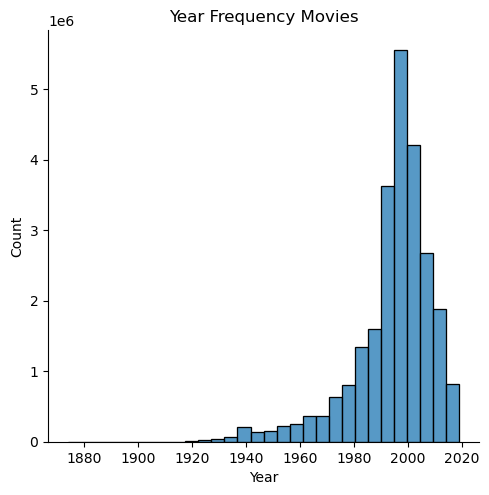

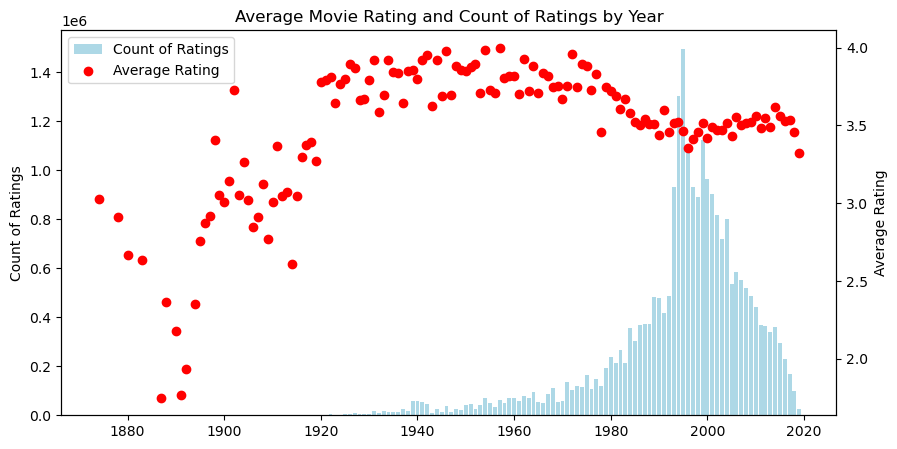

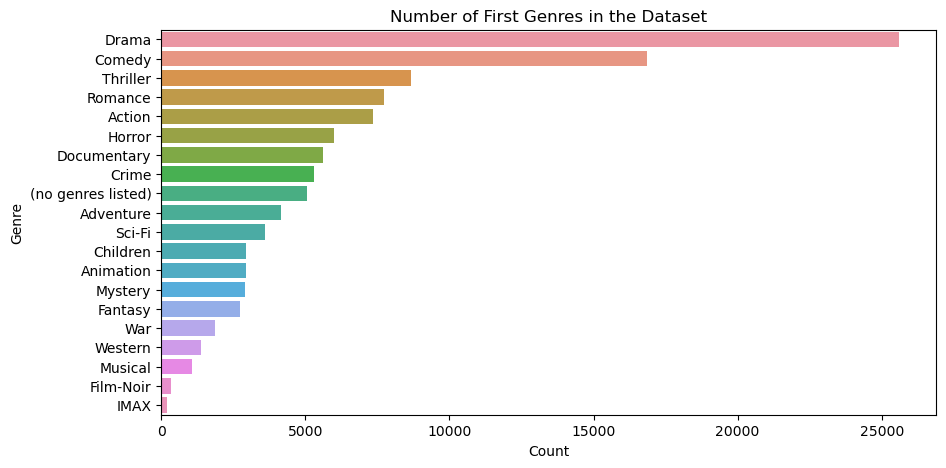

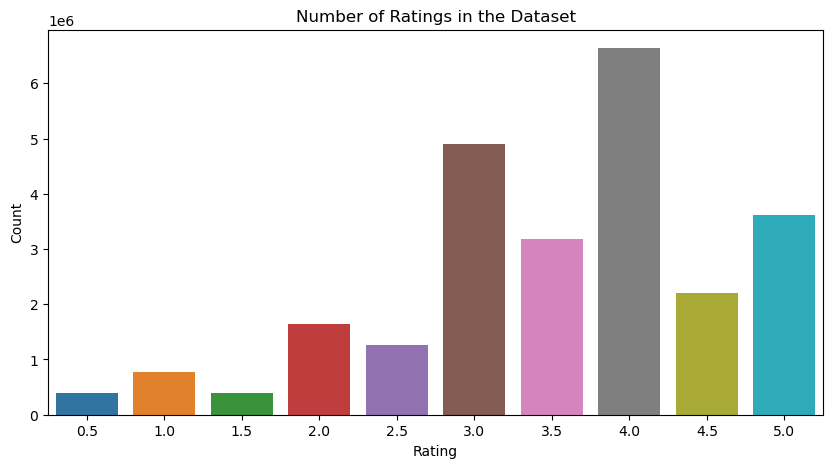

/Users/sandervanduin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


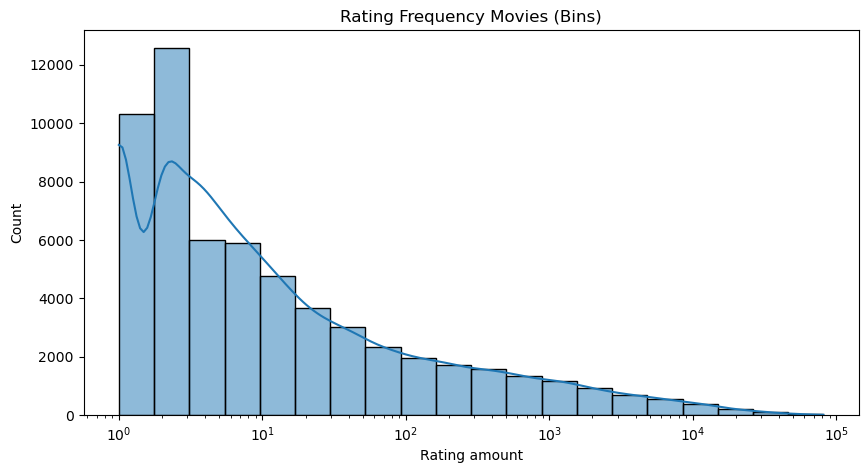

In [9]:
# EDA

# Year Frequency movies
plt.figure(figsize=(10, 5))
sns.displot(year_freq_movies,
            x='year', 
            weights='count', 
            bins=30)
plt.title('Year Frequency Movies')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

##################################################################################

# Plot scatterplot and bar chart for average rating and count of ratings
# Extract year from title
sample_df['year'] = sample_df['title'].str.extract('\((\d{4})\)', expand=False)
# Drop rows with NaN in 'year' column
sample_df = sample_df.dropna(subset=['year'])
# Convert year to numeric
sample_df['year'] = pd.to_numeric(sample_df['year'])
sample_df['year'] = sample_df['year'].astype(int).
# Calculate average rating for each year
yearly_avg_ratings = sample_df.groupby('year')['rating'].mean().reset_index()
# Calculate count of ratings for each year
yearly_rating_counts = sample_df.groupby('year')['rating'].count().reset_index()
# Plot scatterplot and bar chart for average rating and count of ratings
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(yearly_rating_counts['year'], yearly_rating_counts['rating'], color='lightblue', label='Count of Ratings')
ax1.set_ylabel('Count of Ratings')
# Create second y-axis
ax2 = ax1.twinx()
# Plot scatterplot on second y-axis
ax2.scatter(yearly_avg_ratings['year'], yearly_avg_ratings['rating'], color='red', label='Average Rating')
ax2.set_ylabel('Average Rating')
plt.xlabel('Year')
plt.title('Average Movie Rating and Count of Ratings by Year')
# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.show()

##################################################################################

# Counting the number of first genres in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(y='genres', 
            data=df_first_genre, 
            order=df_first_genre['genres']
            .value_counts()
            .index)
plt.title('Number of First Genres in the Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##################################################################################

# Counting the number of ratings in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(x='rating',
            data=df_ratings)
plt.title('Number of Ratings in the Dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##################################################################################

# Rating frequency for all movies in bins
popular_movies_count1 = df_ratings.groupby('movieId').size().reset_index(name='# of ratings')
plt.figure(figsize=(10, 5))
sns.histplot(popular_movies_count1['# of ratings'],
            bins=20, # using 20 bins to showcase the distribution better
            kde=True,
            log_scale=True) # using log scale for better visualization
plt.title('Rating Frequency Movies (Bins)')
plt.xlabel('Rating amount')
plt.ylabel('Count')
plt.show()

#### Explaining the results

- **Year Frequency Movies**: The histogram indicates a significant increase in the number of movies released from around the 1960s, with a peak occurring around the year 2000. Since then, there has been a notable decrease.

- **Average Movie Rating and Count of Ratings by Year**: The combined bar and scatter plot show a consistent count of ratings from the 1980s onwards, with a peak around the year 2000. The average rating appears to hover just below 4.0, with some variation over the years but no clear trend.

- **Number of First Genres in the Dataset**: The bar plot reveals that Drama is the most common first genre, with Comedy and Thriller following. Less common first genres include Film-Noir and IMAX.

- **Number of Ratings in the Dataset**: The count plot for ratings shows a clear preference for higher ratings, with 4.0 being the most common, and very few ratings at the lowest score of 0.5.

- **Rating Frequency Movies (Bins)**: The histogram with a log scale for the rating amount demonstrates that most movies receive a low to moderate number of ratings, with a steep decline as the number of ratings increases, indicating that only a few movies receive a very high number of ratings.

/Users/sandervanduin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sandervanduin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


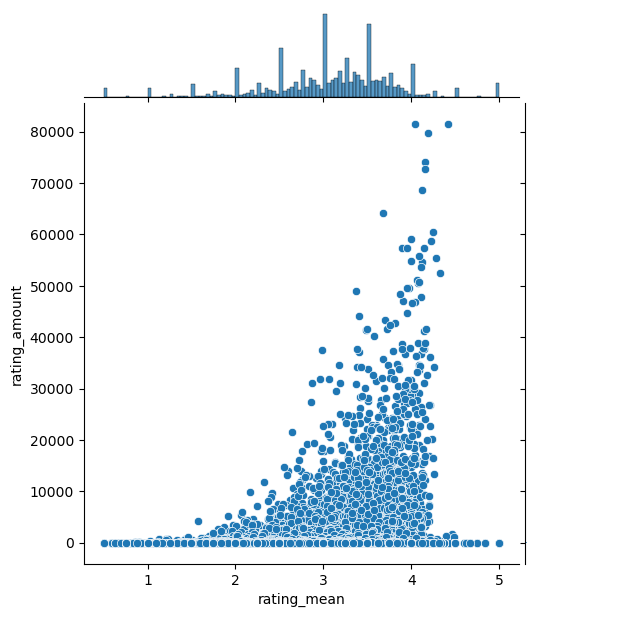

In [10]:
sns.jointplot(x='rating_mean', y='rating_amount', data=df_ratings_new.groupby('movieId').agg(rating_mean = ('rating', 'mean'), rating_amount=('rating', 'count')).reset_index())
plt.tight_layout(pad=0.1)
plt.show()

The visualization is a joint plot combining a scatter plot and a histogram. The scatter plot displays `the relationship between the average rating of movies (on the x-axis)` and `the number of ratings they received (on the y-axis)`, while the histogram at the top shows `the distribution of the average ratings.`

From the plot, it shows that movies with higher average ratings tend to have more ratings, indicating that popular movies often have higher ratings. The histogram shows a distribution of average ratings skewed towards higher values, with very few movies having low average ratings.

## Extra visualization to discover the Movielens Dataset


- A WordCloud from the package WordCloud has been used to showcase the most frequent tags used for a Movie
- And a barplot to get a clearer picture of the WordCloud

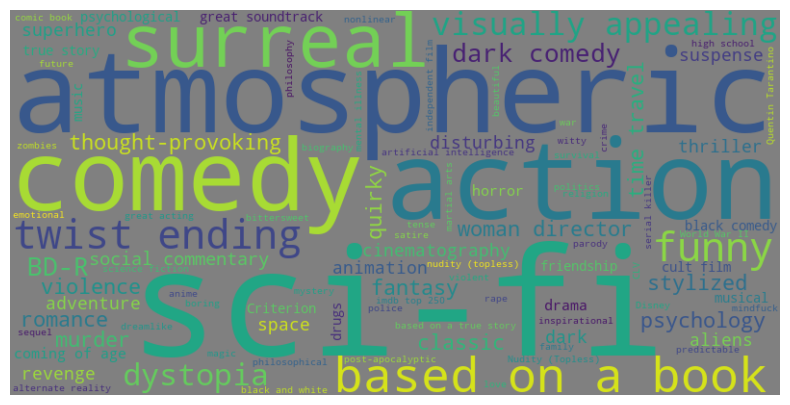

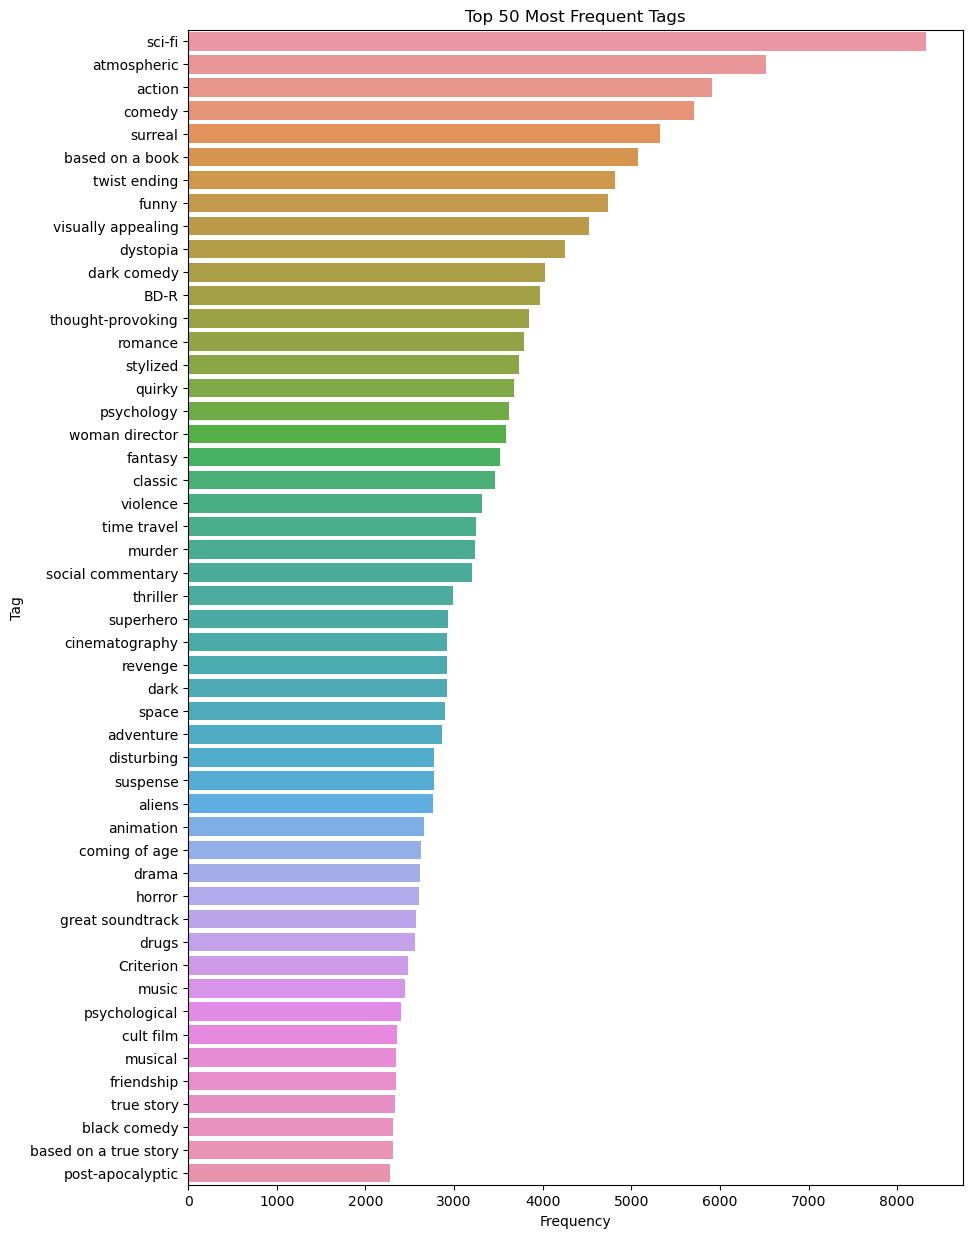

In [9]:
# Get the 10 most frequent tags
tag_counts = df_tags['tag'].value_counts().head(100)
wordcloud = WordCloud(width=800, height=400, background_color='grey').generate_from_frequencies(tag_counts)

# Create a figure
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##################################################################################

# Get the 50 most frequent tags
tag_counts1 = df_tags['tag'].value_counts().head(50)

plt.figure(figsize=(10, 15))
# Create a bar plot
sns.barplot(x=tag_counts1.values, y=tag_counts1.index)
plt.title('Top 50 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

**`Results:`**

The word cloud highlights the most frequent tags used to describe movies, with "atmospheric," "comedy," and "action" being particularly present, indicating these are common descriptors applied by users. The bar chart below reinforces this by showing "sci-fi" as the most frequent tag, followed by "atmospheric" and "action," suggesting that science fiction movies and those with extraordinary displays or settings are especially interesting to users.

<div style="text-align: center; background-color: #FFA726; padding: 20px; color: #FFFFFF; font-family: 'Roboto', Helvetica, Arial, sans-serif;">
    <h2 style="font-weight: bold; font-size: 36px; margin: 0;">4. Making the Dataset Ready for Modelling</h2>
</div>

### Preperation for the modelling datasets

Each new parquet file will be tailored to contain the needed columns with the right name

In [13]:
# Dataset for content based filtering
sample_df_content = sample_df[['userId', 'movieId', 'rating', 'title', 'genres', 'year']].rename(
    columns={'userId' : 'userid',
            'movieId': 'itemid',
            'rating': 'rating',
            'title': 'title', 
            'genres': 'genre',
            'year': 'year'})
sample_df_content.head()
# Export to parquet with selected columns only
sample_df_content.to_parquet('movielens_content1.parquet', index=False)

#####

# Dataset for collaborative filtering personalized
sample_df_item_collaborative_pers = sample_df[['userId', 'movieId', 'rating', 'title', 'genres']].rename(
    columns={'userId' : 'userid',
            'movieId': 'itemid',
            'rating': 'rating',
            'title': 'title', 
            'genres': 'genre'})
sample_df_item_collaborative_pers.head()
# Export to parquet with selected columns only
sample_df_item_collaborative_pers.to_parquet('movielens_item_pers1.parquet', index=False)

#####

# Dataset for collaborative filtering
sample_df_collaborative_general = sample_df[['userId', 'movieId', 'rating']].rename(
    columns={'userId' : 'userid',
            'movieId': 'itemid',
            'rating': 'rating'})
sample_df_collaborative_general.head()
# Export to parquet with selected columns only
sample_df_collaborative_general.to_parquet('movielens_collaborative1.parquet', index=False)

